## Import libraries

In [1]:
import miner_py3 as miner
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import time

## Create directory to save output files

In [11]:
# Path to the miner directory
input_path = os.path.join(os.path.expanduser('~'),'Documents/Github','miner3-wall','miner')

# create name for results folder where output files will be saved
resultsFolder = "miner_network_results"

# name of the folder containing the miner network
networkFolder = "miner_network_results"
#networkFolder = "results_minCorrelation_0o2_50_allFiles"

# create results directory
resultsDirectory = os.path.join(os.path.split(os.getcwd())[0],resultsFolder)
if not os.path.isdir(resultsDirectory):
    os.mkdir(resultsDirectory)
resultsDirectory    

'/Users/serdarturkaslan/Documents/GitHub/GbmMINER/miner_network_results'

## Load primary data

In [12]:
# Load expression Data
expressionFile = '/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/GbmMicroRNAMergedWithIDsZScored.csv' 
expressionData = pd.read_csv(expressionFile,index_col=0,header=0)
#expressionData, conversionTable = miner.preprocess( expressionFile)
expressionData

# Load mutations
common_mutations_file = "/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/mutations.GBM.TCGA.2019.05.01.csv"
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
#mut_matrix = common_mutations.copy()
#miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")

sigSomatic_mutations_file = "/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/SignificantSomaticMutationsGbmRNAAndMicroarray07242020.csv"
sigSomatic_mutations = pd.read_csv(sigSomatic_mutations_file,index_col=0,header=0)
#mut_matrix = common_mutations.copy()
#miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")

nonSilentPathway_mutations_file = "/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/NonSilentPathwayMutationsGbmRNAAndMicroarray07242020.csv"
nonSilentPathway_mutations = pd.read_csv(nonSilentPathway_mutations_file,index_col=0,header=0)
#mut_matrix = common_mutations.copy()
#miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")




#common_mutations = pd.read_csv(os.path.join(input_path,'data','mutations','commonMutations.csv'),index_col=0,header=0)
#translocations = pd.read_csv(os.path.join(input_path,'data','mutations','translocationsIA12.csv'),index_col=0,header=0)
#cytogenetics = pd.read_csv(os.path.join(input_path,'data','mutations','cytogenetics.csv'),index_col=0,header=0)
#cytogenetics = cytogenetics.loc[:,list(set(cytogenetics.columns)&set(expressionData.columns))]
#common_patients_mutations_translocations = list(set(translocations.columns)&set(common_mutations.columns))
#mutation_matrix = pd.concat([common_mutations.loc[:,sigSomatic_mutations],nonSilentPathway_mutations.loc],axis=0)

#If previous results exist, use miner.read_json to load them
revisedClusters = miner.read_json(os.path.join(input_path,networkFolder,"coexpressionDictionary.json"))
coexpressionModules = miner.read_json(os.path.join(input_path,networkFolder,"coexpressionModules.json"))
regulonModules = miner.read_json(os.path.join(input_path,networkFolder,"regulons.json"))
mechanisticOutput = miner.read_json(os.path.join(input_path,networkFolder,"mechanisticOutput.json"))
regulonDf = pd.read_csv(os.path.join(input_path,networkFolder,"regulonDf.csv"),index_col=0,header=0)
overExpressedMembersMatrix = pd.read_csv(os.path.join(input_path,networkFolder,"overExpressedMembers.csv"),index_col=0,header=0)
overExpressedMembersMatrix.index = np.array(overExpressedMembersMatrix.index).astype(str)
underExpressedMembersMatrix = pd.read_csv(os.path.join(input_path,networkFolder,"underExpressedMembers.csv"),index_col=0,header=0)
underExpressedMembersMatrix.index = np.array(underExpressedMembersMatrix.index).astype(str)
eigengenes = pd.read_csv(os.path.join(input_path,networkFolder,"eigengenes.csv"),index_col=0,header=0)
eigengenes.index = np.array(underExpressedMembersMatrix.index).astype(str)

#Load table for converting gene names
id_table_path = os.path.join(input_path,'data',"identifier_mappings.txt")
id_table = pd.read_csv(id_table_path,sep="\t")
id_table = id_table[id_table["Source"] == "Gene Name"]
id_table.index = id_table.iloc[:,0]

## Load network

In [13]:
# Load Causal Mechanistic Network
filtered_causal_results = pd.read_csv(os.path.join(input_path,networkFolder,"filteredCausalResults.csv"),index_col=0,header=0)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/serdarturkaslan/Documents/Github/miner3-wall/miner/miner_network_results/filteredCausalResults.csv'

In [14]:
# Load transcriptional programs
transcriptional_programs = miner.read_json(os.path.join(input_path,networkFolder,'transcriptional_programs.json'))
program_list = [transcriptional_programs[str(key)] for key in range(len(transcriptional_programs.keys()))]

In [21]:
# Load transcriptional states
transcriptional_states = miner.read_json(os.path.join(input_path,networkFolder,'transcriptional_states.json'))
states_list = [transcriptional_states[str(key)] for key in range(len(transcriptional_states.keys()))]
final_state = list(set(expressionData.columns)-set(np.hstack(states_list)))
if len(final_state)>0:
    states_list.append(final_state)
states = states_list.copy()
diff_matrix_MMRF = overExpressedMembersMatrix-underExpressedMembersMatrix

## Load primary survival data

In [18]:
# load primary survival data (i.e., corresponding to expression data training set)
survival_data = pd.read_csv("/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/TCGA_Survival_Gbm.csv",index_col=0,header=0)
survival_data = survival_data.iloc[:,0:2]
survival_data.columns = ["duration","observed"]
survival_data.head()

#overExpressedMembersMatrixMMRF = overExpressedMembersMatrix
kmDf = miner.kmAnalysis(survivalDf=survival_data,durationCol="duration",statusCol="observed")
guanSurvivalDf= miner.guanRank(kmSurvival=kmDf)
guanSurvivalDf.head()
#guanSurvivalDfMMRF.to_csv("guanSurvivalDf_TCGA_GBM.csv")


,duration,observed,kmEstimate,GuanScore
Patient_ID,,,,
TCGA-12-0657,3,1,0.998062,1.000000
TCGA-19-2624,5,1,0.996113,0.998047
TCGA-41-4097,6,1,0.992214,0.995111
TCGA-06-0140,6,1,0.992214,0.995111
TCGA-06-0402,8,1,0.990261,0.992184


## Figures

In [19]:
#set figure style
sns.set(font_scale=1.4,style="whitegrid")

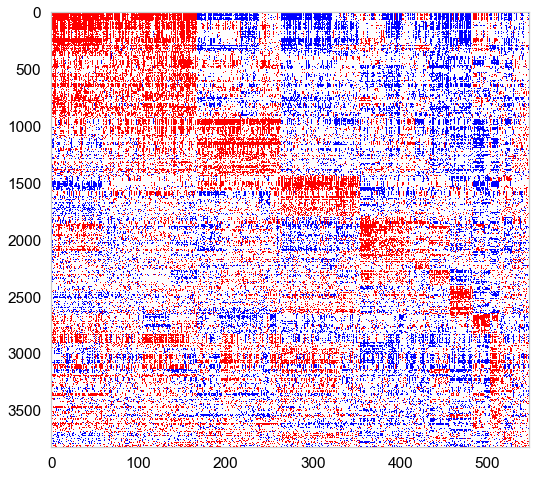

In [22]:
# Regulon activity heatmap
plt.figure(figsize=(8.57,8))
plt.imshow(diff_matrix_MMRF.loc[np.hstack(program_list),np.hstack(states_list)],
          cmap="bwr",vmin=-1,vmax=1,aspect="auto",interpolation='none')
plt.grid(False)

ax = plt.gca()
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

plt.savefig(os.path.join(resultsDirectory,"regulon_activity_heatmap.pdf"),bbox_inches="tight")

## Survival analysis of regulons

In [24]:
# Cox proportional hazards regression of transcriptional programs
t1 = time.time()

cox_regulons_output = miner.parallelMedianSurvivalAnalysis(regulonModules,expressionData,guanSurvivalDf,numCores=5)
cox_regulons_output = cox_regulons_output.iloc[np.argsort(np.array(cox_regulons_output.index).astype(int))]
cox_regulons_output.to_csv(os.path.join(resultsDirectory,'CoxProportionalHazardsRegulons.csv'))
cox_regulons_output.sort_values(by="HR",ascending=False,inplace=True)

print("\nHigh-risk regulons:")
print(cox_regulons_output.iloc[0:5,:])
print("\nLow-risk regulons")
print(cox_regulons_output.iloc[-5:,:])

t2 = time.time()
print("Completed regulon risk analysis in {:.2f} minutes".format((t2-t1)/60.))
      

Completed 0 of 764 iterations
Completed 0 of 765 iterations
Completed 0 of 765 iterations
Completed 0 of 765 iterations
Completed 0 of 765 iterations
Completed 100 of 764 iterations
Completed 100 of 765 iterations
Completed 100 of 765 iterations
Completed 100 of 765 iterations
Completed 100 of 765 iterations
Completed 200 of 764 iterations
Completed 200 of 765 iterations
Completed 200 of 765 iterations
Completed 200 of 765 iterations
Completed 200 of 765 iterations
Completed 300 of 765 iterations
Completed 300 of 764 iterations
Completed 300 of 765 iterations
Completed 300 of 765 iterations
Completed 300 of 765 iterations
Completed 400 of 765 iterations
Completed 400 of 765 iterations
Completed 400 of 764 iterations
Completed 400 of 765 iterations
Completed 400 of 765 iterations
Completed 500 of 765 iterations
Completed 500 of 765 iterations
Completed 500 of 764 iterations
Completed 500 of 765 iterations
Completed 500 of 765 iterations
Completed 600 of 765 iterations
Completed 600 of 7

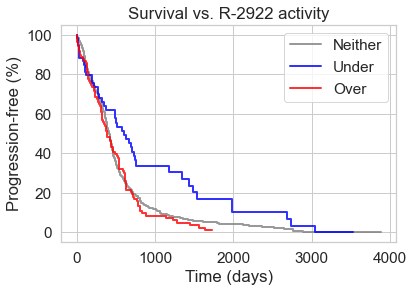

In [25]:
# Explore survival versus regulon activity
key = cox_regulons_output.index[0]
output_file = os.path.join(resultsDirectory,"regulon_"+key+"_survival.pdf")
regulon_cox_results = miner.regulon_survival(key,diff_matrix_MMRF,guanSurvivalDf,filename=output_file,title="Survival vs. R-"+key+" activity")

## Survival analysis of transcriptional programs

In [26]:
# Create dictionary of program genes
# make dictionary of genes by program
pr_genes = {}
for i in range(len(program_list)):
    rgns = program_list[i]
    genes = []
    for r in rgns:
        genes.append(regulonModules[r])
    genes = list(set(np.hstack(genes)))
    pr_genes[i] = genes

In [27]:
referenceDictionary = pr_genes
# create a background matrix used for statistical hypothesis testing
bkgd = miner.backgroundDf(expressionData)
# for each cluster, give samples that show high coherent cluster activity
overExpressedMembers_pr = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label=2,p=0.05)
# for each clus|ter, give samples that show low coherent cluster activity
underExpressedMembers_pr = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label=0,p=0.05)

# write membership matrices to .csv file
overExpressedMembersMatrix_pr = miner.membershipToIncidence(overExpressedMembers_pr,expressionData)
underExpressedMembersMatrix_pr = miner.membershipToIncidence(underExpressedMembers_pr,expressionData)


done!
done!


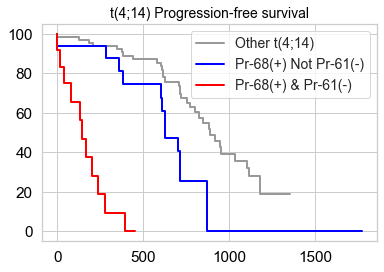

In [141]:
# Substratify t(4;14)
t414_patients = miner.getMutations("RNASeq_WHSC1_Call",translocations)
pr68_up = miner.getMutations(68,overExpressedMembersMatrix_pr)
pr61_dn = miner.getMutations(61,underExpressedMembersMatrix_pr)

# Pr-68(+), Pr-61(-)
pr68up_pr61dn = miner.intersect(pr68_up,pr61_dn)
pr68up_not_pr61dn = miner.setdiff(pr68_up,pr61_dn)

# Subset to t(4;14)
pr68up_pr61dn = miner.intersect(pr68up_pr61dn,t414_patients)
pr68up_not_pr61dn = miner.intersect(pr68up_not_pr61dn,t414_patients)
other_t414 = miner.setdiff(t414_patients,miner.union(pr68up_pr61dn,pr68up_not_pr61dn))

#plot comparison
srv = guanSurvivalDfMMRF.copy()
groups = [other_t414,pr68up_not_pr61dn,pr68up_pr61dn]
labels = ["Other t(4;14)","Pr-68(+) Not Pr-61(-)","Pr-68(+) & Pr-61(-)"]
colors = [[0.6,0.6,0.6],"blue","red"]
miner.kmplot(srv=srv,groups=groups,labels=labels,xlim_=(-100,1750),
                 filename=None,lw=2,color=colors,alpha=1)  
plt.title("t(4;14) Progression-free survival",fontsize=14,color="black")
plt.legend(frameon=True,fontsize="small")
plt.ylabel(None)
plt.xlabel(None)

ax = plt.gca()
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

#save figure
plt.savefig(os.path.join(resultsDirectory,"kmplots_t414.pdf"),bbox_inches="tight")

In [28]:
# Cox proportional hazards regression of transcriptional programs
t1 = time.time()

cox_programs_output = miner.parallelMedianSurvivalAnalysis(pr_genes,expressionData,guanSurvivalDf,numCores=5)
cox_programs_output = cox_programs_output.iloc[np.argsort(np.array(cox_programs_output.index).astype(int))]
cox_programs_output.to_csv(os.path.join(resultsDirectory,'CoxProportionalHazardsPrograms.csv'))
cox_programs_output.sort_values(by="HR",ascending=False,inplace=True)

print("\nHigh-risk programs:")
print(cox_programs_output.iloc[0:5,:])
print("\nLow-risk programs")
print(cox_programs_output.iloc[-5:,:])

t2 = time.time()
print(t2-t1)

Completed 0 of 35 iterations
Completed 0 of 36 iterations
Completed 0 of 36 iterations
Completed 0 of 36 iterations
Completed 0 of 36 iterations

High-risk programs:
          HR   p-value
5   4.072882  0.000046
26  3.973544  0.000071
1   3.513161  0.000443
44  3.278092  0.001045
23  3.197564  0.001386

Low-risk programs
           HR   p-value
61  -2.176131  0.029546
55  -2.251256  0.024369
59  -2.702989  0.006872
57  -3.766562  0.000166
158 -4.146602  0.000034
7.417418003082275


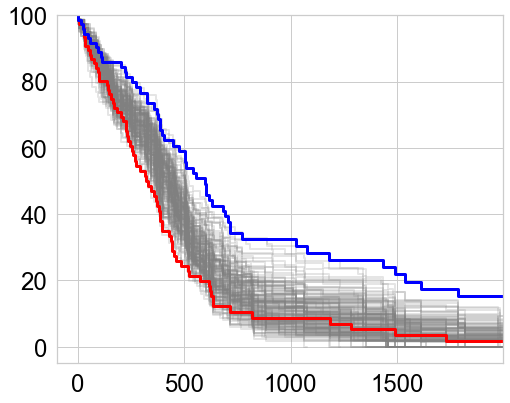

In [29]:
# Kaplan-Meier plot of all programs (median expression)
srv = guanSurvivalDf.copy()
keys = list(pr_genes.keys())

plt.figure(figsize=(8,6.4))
plt.xlim(-100,2000)
for key in keys:
    cluster = np.array(expressionData.loc[pr_genes[key],:])
    median_ = np.mean(cluster,axis=0)
    threshold = np.percentile(median_,85)
    median_[median_>=threshold] = 1
    median_[median_<threshold] = 0
    membership_df = pd.DataFrame(median_)
    membership_df.index = expressionData.columns
    membership_df.columns = [key]

    cox_hr, cox_p = miner.survivalMembershipAnalysisDirect(membership_df,guanSurvivalDf)

    groups = [membership_df.index[np.where(membership_df[key]==1)[0]]]
    labels = ["{0}: {1:.2f}".format(str(key), cox_hr)]
    miner.kmplot(srv=srv,groups=groups,labels=labels,xlim_=(-100,1750),
                 filename=None,lw=2,color=["gray"],alpha=0.2)  


key_min = cox_programs_output.index[0]
key_max = cox_programs_output.index[-1]

cluster = np.array(expressionData.loc[pr_genes[key_min],:])
median_ = np.mean(cluster,axis=0)
threshold = np.percentile(median_,85)
median_[median_>=threshold] = 1
median_[median_<threshold] = 0
membership_df = pd.DataFrame(median_)
membership_df.index = expressionData.columns
membership_df.columns = [key_min]

cox_hr, cox_p = miner.survivalMembershipAnalysisDirect(membership_df,guanSurvivalDf)

groups = [membership_df.index[np.where(membership_df[key_min]==1)[0]]]
labels = ["{0}: {1:.2f}".format(str(key), cox_hr)]

miner.kmplot(srv=srv,groups=groups,labels=labels,xlim_=(-100,1750),
             filename=None,lw=3,color=["red"],alpha=1)  

    
cluster = np.array(expressionData.loc[pr_genes[key_max],:])
median_ = np.mean(cluster,axis=0)
threshold = np.percentile(median_,85)
median_[median_>=threshold] = 1
median_[median_<threshold] = 0
membership_df = pd.DataFrame(median_)
membership_df.index = expressionData.columns
membership_df.columns = [key_max]

cox_hr, cox_p = miner.survivalMembershipAnalysisDirect(membership_df,guanSurvivalDf)

groups = [membership_df.index[np.where(membership_df[key_max]==1)[0]]]
labels = ["{0}: {1:.2f}".format(str(key), cox_hr)]

miner.kmplot(srv=srv,groups=groups,labels=labels,xlim_=(-100,1750),
             filename=None,lw=3,color=["blue"],alpha=1) 

plt.ylim(-5,100)
plt.xticks(np.arange(0,2000,500),fontsize=24)
plt.yticks(np.arange(0,100.05,20),fontsize=24)

plt.xlabel(None)
plt.ylabel(None)

ax = plt.gca()
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

plt.savefig(os.path.join(resultsDirectory,"kmplots_programs.pdf"),bbox_inches="tight")

## Survival analysis of transcriptional states

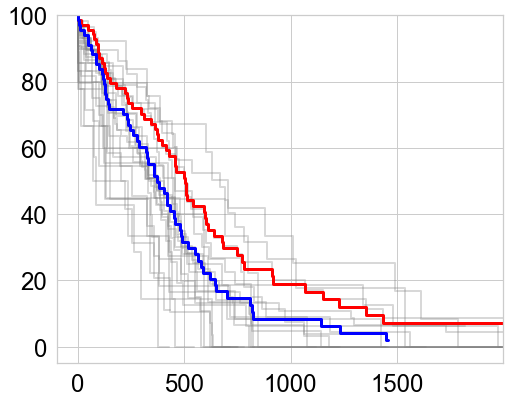

In [31]:
# Kaplan-Meier plot of all programs (median expression)
plt.figure(figsize=(8,6.4))
#plt.style.use('seaborn-whitegrid')
plt.xlim(-100,2000)

srv = guanSurvivalDf.copy()
for key in range(len(states_list)):

    median_df = pd.DataFrame(np.zeros(expressionData.shape[1]))
    median_df.index = expressionData.columns
    median_df.columns = [key]
    median_df.loc[states_list[key],key] = 1

    cox_hr, cox_p = miner.survivalMembershipAnalysisDirect(median_df,guanSurvivalDf)

    groups = [median_df.index[np.where(median_df[key]==1)[0]]]
    labels = ["{0}: {1:.2f}".format(str(key), cox_hr)]

    miner.kmplot(srv=srv,groups=groups,labels=labels,xlim_=(-100,1750),
                 filename=None,lw=2,color=["gray"],alpha=0.3)  


# highlight_list = [
#                  np.hstack([states_list[4],states_list[5],states_list[16],states_list[23]])]

highlight_list = [
                 np.hstack([states_list[10],states_list[14],states_list[21]])]

for key in range(len(highlight_list)):
    median_df = pd.DataFrame(np.zeros(expressionData.shape[1]))
    median_df.index = expressionData.columns
    median_df.columns = [key]
    median_df.loc[highlight_list[key],key] = 1

    cox_hr, cox_p = miner.survivalMembershipAnalysisDirect(median_df,guanSurvivalDf)

    groups = [median_df.index[np.where(median_df[key]==1)[0]]]
    labels = ["{0}: {1:.2f}".format(str(key), cox_hr)]

    miner.kmplot(srv=srv,groups=groups,labels=labels,xlim_=(-100,1750),
                 filename=None,lw=3,color=["red"],alpha=1)  
    
# Combine high-risk states
# highlight_list = [
#                  np.hstack([states_list[10],states_list[14],states_list[21]])]

highlight_list = [
                 np.hstack([states_list[4],states_list[5],states_list[16],states_list[23]])]

for key in range(len(highlight_list)):
    median_df = pd.DataFrame(np.zeros(expressionData.shape[1]))
    median_df.index = expressionData.columns
    median_df.columns = [key]
    median_df.loc[highlight_list[key],key] = 1

    cox_hr, cox_p = miner.survivalMembershipAnalysisDirect(median_df,guanSurvivalDf)

    groups = [median_df.index[np.where(median_df[key]==1)[0]]]
    labels = ["{0}: {1:.2f}".format(str(key), cox_hr)]

    miner.kmplot(srv=srv,groups=groups,labels=labels,xlim_=(-100,1750),
                 filename=None,lw=3,color=["blue"],alpha=1)  

plt.ylim(-5,100)
plt.xticks(np.arange(0,2000,500),fontsize=24)
plt.yticks(np.arange(0,100.05,20),fontsize=24)
plt.xlabel(None)
plt.ylabel(None)

ax = plt.gca()
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

plt.savefig(os.path.join(resultsDirectory,"kmplots_states.pdf"),bbox_inches="tight")

## Generate boxplot data for transcriptional states

In [32]:
survival_patients = list(guanSurvivalDf.index)
# t414_patients = translocations.columns[
#     np.where(translocations.loc["RNASeq_WHSC1_Call",:]==1)[0]
# ]
# t1114_patients = translocations.columns[
#     np.where(translocations.loc["RNASeq_CCND1_Call",:]==1)[0]
# ]

min_patients = 5
ranks = []
boxplot_data = []
boxplot_names = []
boxplot_samples = []
boxplot_labels = []
#percent_t414 = []
#percent_t1114 = []
for key in range(len(states_list)):
    state = states_list[key]
    overlap_patients = list(set(survival_patients)&set(state))
    if len(overlap_patients) < min_patients:
        continue
    guan_data = list(guanSurvivalDf.loc[overlap_patients,"GuanScore"])
    boxplot_samples.append(overlap_patients)
    boxplot_data.append(guan_data)
    boxplot_names.append([1+key for i in range(len(overlap_patients))])
    risk_score = np.median(guan_data)
    ranks.append(risk_score)
    
    #t414_overlap = len(set(state)&set(t414_patients))
#     t1114_overlap = len(set(state)&set(t1114_patients))
#     percent_t414_ = float(t414_overlap)/len(state)
#     percent_t1114_ = float(t1114_overlap)/len(state)
#     percent_t414.append(percent_t414_)
#     percent_t1114.append(percent_t1114_)
ranks            

#Format labels into dataframe
labels = np.hstack([boxplot_names[i] for i in list(np.argsort(ranks))])
labels_df = pd.DataFrame(labels)
labels_df.index = np.hstack([boxplot_samples[i] for i in list(np.argsort(ranks))])
labels_df.columns = ["label"]
plot_data = pd.concat([guanSurvivalDf.loc[labels_df.index,"GuanScore"],labels_df],axis=1)

rank_order = np.array(list(set(np.hstack(boxplot_names))))[np.argsort(ranks)]
# ranked_t414 = np.array(percent_t414)[np.argsort(ranks)]
# ranked_t1114 = np.array(percent_t1114)[np.argsort(ranks)]

In [37]:
rank_order

array([16, 23, 12, 15,  4, 13, 11, 17,  6,  7, 19,  5,  2,  9,  8, 14,  3,
       10,  1, 25, 22, 21, 24, 18, 20])

## Violin plots by states

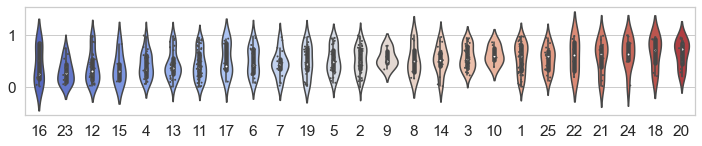

In [33]:
f, ax = plt.subplots(figsize=(12, 2))

# Plot the orbital period with horizontal boxes
sns.violinplot(x="label", y="GuanScore", data=plot_data,fliersize=0,
            palette="coolwarm",order=rank_order)

# Add in points to show each observation
sns.stripplot(x="label", y="GuanScore", data=plot_data,
              size=2, color=".3", linewidth=0,order=rank_order)

# Tweak the visual presentation
ax.set(ylabel="")
ax.set(xlabel="")

# Save figure
plt.savefig(os.path.join(resultsDirectory,"violin_states_risk.pdf"),bbox_inches="tight")

## Boxplots by states

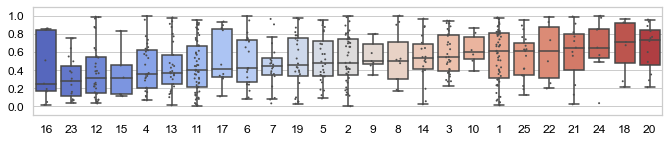

In [34]:
f, ax = plt.subplots(figsize=(11.27, 2))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="label", y="GuanScore", data=plot_data,fliersize=0,
            palette="coolwarm",order=rank_order)

# Add in points to show each observation
sns.stripplot(x="label", y="GuanScore", data=plot_data,
              size=2, color=".3", linewidth=0,order=rank_order)

# Tweak the visual presentation
ax.set(ylabel="")
ax.set(xlabel="")
ax.set(ylim=(-0.1,1.1))
ax.set(yticks=np.arange(0,1.05,0.2))
ax.tick_params(labelsize=12)
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

# Save figure
plt.savefig(os.path.join(resultsDirectory,"boxplot_states_risk.pdf"),bbox_inches="tight")

In [49]:
TCGAPatientSubType = pd.read_csv("/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/TCGA_Survival_Gbm.csv",header=0)
TCGAPatientSubType = TCGAPatientSubType[TCGAPatientSubType['Histological_type']== "untreated primary (de novo) gbm"]
TCGAPatientSubTypeSpecific = TCGAPatientSubType[TCGAPatientSubType['Subtype']== "g_cimp"]
TCGAPatientSubTypeClass = set(list(TCGAPatientSubTypeSpecific['Patient_ID']))
TS1 = TCGAPatientSubTypeClass.intersection(set(states_list[0]))
TS2 = TCGAPatientSubTypeClass.intersection(set(states_list[1]))
TS3 = TCGAPatientSubTypeClass.intersection(set(states_list[2]))
TS4 = TCGAPatientSubTypeClass.intersection(set(states_list[3]))
TS5 = TCGAPatientSubTypeClass.intersection(set(states_list[4]))
TS6 = TCGAPatientSubTypeClass.intersection(set(states_list[5]))
TS7 = TCGAPatientSubTypeClass.intersection(set(states_list[6]))
TS8 = TCGAPatientSubTypeClass.intersection(set(states_list[7]))
TS9 = TCGAPatientSubTypeClass.intersection(set(states_list[8]))
TS10 = TCGAPatientSubTypeClass.intersection(set(states_list[9]))
TS11 = TCGAPatientSubTypeClass.intersection(set(states_list[10]))
TS12 = TCGAPatientSubTypeClass.intersection(set(states_list[11]))
TS13 = TCGAPatientSubTypeClass.intersection(set(states_list[12]))
TS14 = TCGAPatientSubTypeClass.intersection(set(states_list[13]))
TS15 = TCGAPatientSubTypeClass.intersection(set(states_list[14]))
TS16 = TCGAPatientSubTypeClass.intersection(set(states_list[15]))
TS17 = TCGAPatientSubTypeClass.intersection(set(states_list[16]))
TS18 = TCGAPatientSubTypeClass.intersection(set(states_list[17]))
TS19 = TCGAPatientSubTypeClass.intersection(set(states_list[18]))
TS20 = TCGAPatientSubTypeClass.intersection(set(states_list[19]))
TS21 = TCGAPatientSubTypeClass.intersection(set(states_list[20]))
TS22 = TCGAPatientSubTypeClass.intersection(set(states_list[21]))
TS23 = TCGAPatientSubTypeClass.intersection(set(states_list[22]))
TS24 = TCGAPatientSubTypeClass.intersection(set(states_list[23]))
TS25 = TCGAPatientSubTypeClass.intersection(set(states_list[24]))


TCGAPatientSubType = pd.read_csv("/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/TCGA_Survival_Gbm.csv",header=0)
TCGAPatientSubType = TCGAPatientSubType[TCGAPatientSubType['Histological_type']== "untreated primary (de novo) gbm"]
TCGAPatientSubTypeSpecific = TCGAPatientSubType[TCGAPatientSubType['Subtype']== "classical"]
TCGAPatientSubTypeClass = set(list(TCGAPatientSubTypeSpecific['Patient_ID']))
TS1_1 = TCGAPatientSubTypeClass.intersection(set(states_list[0]))
TS2_1 = TCGAPatientSubTypeClass.intersection(set(states_list[1]))
TS3_1 = TCGAPatientSubTypeClass.intersection(set(states_list[2]))
TS4_1 = TCGAPatientSubTypeClass.intersection(set(states_list[3]))
TS5_1 = TCGAPatientSubTypeClass.intersection(set(states_list[4]))
TS6_1 = TCGAPatientSubTypeClass.intersection(set(states_list[5]))
TS7_1 = TCGAPatientSubTypeClass.intersection(set(states_list[6]))
TS8_1 = TCGAPatientSubTypeClass.intersection(set(states_list[7]))
TS9_1 = TCGAPatientSubTypeClass.intersection(set(states_list[8]))
TS10_1 = TCGAPatientSubTypeClass.intersection(set(states_list[9]))
TS11_1 = TCGAPatientSubTypeClass.intersection(set(states_list[10]))
TS12_1 = TCGAPatientSubTypeClass.intersection(set(states_list[11]))
TS13_1 = TCGAPatientSubTypeClass.intersection(set(states_list[12]))
TS14_1 = TCGAPatientSubTypeClass.intersection(set(states_list[13]))
TS15_1 = TCGAPatientSubTypeClass.intersection(set(states_list[14]))
TS16_1 = TCGAPatientSubTypeClass.intersection(set(states_list[15]))
TS17_1 = TCGAPatientSubTypeClass.intersection(set(states_list[16]))
TS18_1 = TCGAPatientSubTypeClass.intersection(set(states_list[17]))
TS19_1 = TCGAPatientSubTypeClass.intersection(set(states_list[18]))
TS20_1 = TCGAPatientSubTypeClass.intersection(set(states_list[19]))
TS21_1 = TCGAPatientSubTypeClass.intersection(set(states_list[20]))
TS22_1 = TCGAPatientSubTypeClass.intersection(set(states_list[21]))
TS23_1 = TCGAPatientSubTypeClass.intersection(set(states_list[22]))
TS24_1 = TCGAPatientSubTypeClass.intersection(set(states_list[23]))
TS25_1 = TCGAPatientSubTypeClass.intersection(set(states_list[24]))


TCGAPatientSubType = pd.read_csv("/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/TCGA_Survival_Gbm.csv",header=0)
TCGAPatientSubType = TCGAPatientSubType[TCGAPatientSubType['Histological_type']== "untreated primary (de novo) gbm"]
TCGAPatientSubTypeSpecific = TCGAPatientSubType[TCGAPatientSubType['Subtype']== "proneural"]
TCGAPatientSubTypeClass = set(list(TCGAPatientSubTypeSpecific['Patient_ID']))
TS1_2 = TCGAPatientSubTypeClass.intersection(set(states_list[0]))
TS2_2 = TCGAPatientSubTypeClass.intersection(set(states_list[1]))
TS3_2 = TCGAPatientSubTypeClass.intersection(set(states_list[2]))
TS4_2 = TCGAPatientSubTypeClass.intersection(set(states_list[3]))
TS5_2 = TCGAPatientSubTypeClass.intersection(set(states_list[4]))
TS6_2 = TCGAPatientSubTypeClass.intersection(set(states_list[5]))
TS7_2 = TCGAPatientSubTypeClass.intersection(set(states_list[6]))
TS8_2 = TCGAPatientSubTypeClass.intersection(set(states_list[7]))
TS9_2 = TCGAPatientSubTypeClass.intersection(set(states_list[8]))
TS10_2 = TCGAPatientSubTypeClass.intersection(set(states_list[9]))
TS11_2 = TCGAPatientSubTypeClass.intersection(set(states_list[10]))
TS12_2 = TCGAPatientSubTypeClass.intersection(set(states_list[11]))
TS13_2 = TCGAPatientSubTypeClass.intersection(set(states_list[12]))
TS14_2 = TCGAPatientSubTypeClass.intersection(set(states_list[13]))
TS15_2 = TCGAPatientSubTypeClass.intersection(set(states_list[14]))
TS16_2 = TCGAPatientSubTypeClass.intersection(set(states_list[15]))
TS17_2 = TCGAPatientSubTypeClass.intersection(set(states_list[16]))
TS18_2 = TCGAPatientSubTypeClass.intersection(set(states_list[17]))
TS19_2 = TCGAPatientSubTypeClass.intersection(set(states_list[18]))
TS20_2 = TCGAPatientSubTypeClass.intersection(set(states_list[19]))
TS21_2 = TCGAPatientSubTypeClass.intersection(set(states_list[20]))
TS22_2 = TCGAPatientSubTypeClass.intersection(set(states_list[21]))
TS23_2 = TCGAPatientSubTypeClass.intersection(set(states_list[22]))
TS24_2 = TCGAPatientSubTypeClass.intersection(set(states_list[23]))
TS25_2 = TCGAPatientSubTypeClass.intersection(set(states_list[24]))


TCGAPatientSubType = pd.read_csv("/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/TCGA_Survival_Gbm.csv",header=0)
TCGAPatientSubType = TCGAPatientSubType[TCGAPatientSubType['Histological_type']== "untreated primary (de novo) gbm"]
TCGAPatientSubTypeSpecific = TCGAPatientSubType[TCGAPatientSubType['Subtype']== "neural"]
TCGAPatientSubTypeClass = set(list(TCGAPatientSubTypeSpecific['Patient_ID']))
TS1_3 = TCGAPatientSubTypeClass.intersection(set(states_list[0]))
TS2_3 = TCGAPatientSubTypeClass.intersection(set(states_list[1]))
TS3_3 = TCGAPatientSubTypeClass.intersection(set(states_list[2]))
TS4_3 = TCGAPatientSubTypeClass.intersection(set(states_list[3]))
TS5_3 = TCGAPatientSubTypeClass.intersection(set(states_list[4]))
TS6_3 = TCGAPatientSubTypeClass.intersection(set(states_list[5]))
TS7_3 = TCGAPatientSubTypeClass.intersection(set(states_list[6]))
TS8_3 = TCGAPatientSubTypeClass.intersection(set(states_list[7]))
TS9_3 = TCGAPatientSubTypeClass.intersection(set(states_list[8]))
TS10_3 = TCGAPatientSubTypeClass.intersection(set(states_list[9]))
TS11_3 = TCGAPatientSubTypeClass.intersection(set(states_list[10]))
TS12_3 = TCGAPatientSubTypeClass.intersection(set(states_list[11]))
TS13_3 = TCGAPatientSubTypeClass.intersection(set(states_list[12]))
TS14_3 = TCGAPatientSubTypeClass.intersection(set(states_list[13]))
TS15_3 = TCGAPatientSubTypeClass.intersection(set(states_list[14]))
TS16_3 = TCGAPatientSubTypeClass.intersection(set(states_list[15]))
TS17_3 = TCGAPatientSubTypeClass.intersection(set(states_list[16]))
TS18_3 = TCGAPatientSubTypeClass.intersection(set(states_list[17]))
TS19_3 = TCGAPatientSubTypeClass.intersection(set(states_list[18]))
TS20_3 = TCGAPatientSubTypeClass.intersection(set(states_list[19]))
TS21_3 = TCGAPatientSubTypeClass.intersection(set(states_list[20]))
TS22_3 = TCGAPatientSubTypeClass.intersection(set(states_list[21]))
TS23_3 = TCGAPatientSubTypeClass.intersection(set(states_list[22]))
TS24_3 = TCGAPatientSubTypeClass.intersection(set(states_list[23]))
TS25_3 = TCGAPatientSubTypeClass.intersection(set(states_list[24]))


TCGAPatientSubType = pd.read_csv("/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/TCGA_Survival_Gbm.csv",header=0)
TCGAPatientSubType = TCGAPatientSubType[TCGAPatientSubType['Histological_type']== "untreated primary (de novo) gbm"]
TCGAPatientSubTypeSpecific = TCGAPatientSubType[TCGAPatientSubType['Subtype']== "mesenchymal"]
TCGAPatientSubTypeClass = set(list(TCGAPatientSubTypeSpecific['Patient_ID']))
TS1_4 = TCGAPatientSubTypeClass.intersection(set(states_list[0]))
TS2_4 = TCGAPatientSubTypeClass.intersection(set(states_list[1]))
TS3_4 = TCGAPatientSubTypeClass.intersection(set(states_list[2]))
TS4_4 = TCGAPatientSubTypeClass.intersection(set(states_list[3]))
TS5_4 = TCGAPatientSubTypeClass.intersection(set(states_list[4]))
TS6_4 = TCGAPatientSubTypeClass.intersection(set(states_list[5]))
TS7_4 = TCGAPatientSubTypeClass.intersection(set(states_list[6]))
TS8_4 = TCGAPatientSubTypeClass.intersection(set(states_list[7]))
TS9_4 = TCGAPatientSubTypeClass.intersection(set(states_list[8]))
TS10_4 = TCGAPatientSubTypeClass.intersection(set(states_list[9]))
TS11_4 = TCGAPatientSubTypeClass.intersection(set(states_list[10]))
TS12_4 = TCGAPatientSubTypeClass.intersection(set(states_list[11]))
TS13_4 = TCGAPatientSubTypeClass.intersection(set(states_list[12]))
TS14_4 = TCGAPatientSubTypeClass.intersection(set(states_list[13]))
TS15_4 = TCGAPatientSubTypeClass.intersection(set(states_list[14]))
TS16_4 = TCGAPatientSubTypeClass.intersection(set(states_list[15]))
TS17_4 = TCGAPatientSubTypeClass.intersection(set(states_list[16]))
TS18_4 = TCGAPatientSubTypeClass.intersection(set(states_list[17]))
TS19_4 = TCGAPatientSubTypeClass.intersection(set(states_list[18]))
TS20_4 = TCGAPatientSubTypeClass.intersection(set(states_list[19]))
TS21_4 = TCGAPatientSubTypeClass.intersection(set(states_list[20]))
TS22_4 = TCGAPatientSubTypeClass.intersection(set(states_list[21]))
TS23_4 = TCGAPatientSubTypeClass.intersection(set(states_list[22]))
TS24_4 = TCGAPatientSubTypeClass.intersection(set(states_list[23]))
TS25_4 = TCGAPatientSubTypeClass.intersection(set(states_list[24]))


print(len(TS16), len(TS23), len(TS12), len(TS15), len(TS4), len(TS13), len(TS11), len(TS17), len(TS6), len(TS7), len(TS19), len(TS5), len(TS2), len(TS9), len(TS8), len(TS14), len(TS3), len(TS10), len(TS1), len(TS25), len(TS22), len(TS21), len(TS24), len(TS18), len(TS20))
print(len(TS16_1), len(TS23_1), len(TS12_1), len(TS15_1), len(TS4_1), len(TS13_1), len(TS11_1), len(TS17_1), len(TS6_1), len(TS7_1), len(TS19_1), len(TS5_1), len(TS2_1), len(TS9_1), len(TS8_1), len(TS14_1), len(TS3_1), len(TS10_1), len(TS1_1), len(TS25_1), len(TS22_1), len(TS21_1), len(TS24_1), len(TS18_1), len(TS20_1))
print(len(TS16_2), len(TS23_2), len(TS12_2), len(TS15_2), len(TS4_2), len(TS13_2), len(TS11_2), len(TS17_2), len(TS6_2), len(TS7_2), len(TS19_2), len(TS5_2), len(TS2_2), len(TS9_2), len(TS8_2), len(TS14_2), len(TS3_2), len(TS10_2), len(TS1_2), len(TS25_2), len(TS22_2), len(TS21_2), len(TS24_2), len(TS18_2), len(TS20_2))
print(len(TS16_3), len(TS23_3), len(TS12_3), len(TS15_3), len(TS4_3), len(TS13_3), len(TS11_3), len(TS17_3), len(TS6_3), len(TS7_3), len(TS19_3), len(TS5_3), len(TS2_3), len(TS9_3), len(TS8_3), len(TS14_3), len(TS3_3), len(TS10_3), len(TS1_3), len(TS25_3), len(TS22_3), len(TS21_3), len(TS24_3), len(TS18_3), len(TS20_3))
print(len(TS16_4), len(TS23_4), len(TS12_4), len(TS15_4), len(TS4_4), len(TS13_4), len(TS11_4), len(TS17_4), len(TS6_4), len(TS7_4), len(TS19_4), len(TS5_4), len(TS2_4), len(TS9_4), len(TS8_4), len(TS14_4), len(TS3_4), len(TS10_4), len(TS1_4), len(TS25_4), len(TS22_4), len(TS21_4), len(TS24_4), len(TS18_4), len(TS20_4))


0 1 14 1 0 0 16 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
6 3 0 2 3 3 5 0 16 19 1 26 9 5 10 1 8 4 3 6 2 2 0 2 1
0 1 11 0 0 1 34 1 2 0 17 1 3 0 0 1 2 0 1 6 0 1 9 0 2
3 0 2 2 2 18 3 6 0 1 4 1 1 0 0 16 1 1 2 3 2 2 0 3 4
0 6 2 0 24 3 1 3 1 0 0 0 30 1 1 0 19 1 46 4 2 3 0 2 1


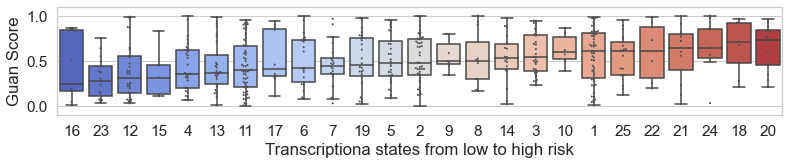

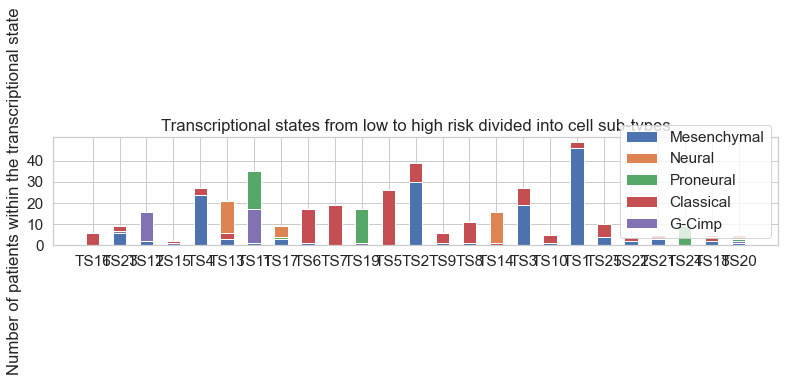

In [51]:
f, ax = plt.subplots(figsize=(13, 2))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="label", y="GuanScore", data=plot_data,fliersize=0,
            palette="coolwarm",order=rank_order)

# Add in points to show each observation
sns.swarmplot(x="label", y="GuanScore", data=plot_data,
              size=2, color=".3", linewidth=0,order=rank_order)

# Tweak the visual presentation
ax.set(ylabel="Guan Score")
ax.set(xlabel="Transcriptiona states from low to high risk")
ax.set(ylim=(-0.1,1.1))

# Save figure
plt.savefig(os.path.join(resultsDirectory,"boxplot_states_risk.pdf"),bbox_inches="tight")
import numpy as np
import matplotlib.pyplot as plt


N = 25

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

# g_cimp = (0, 0, 29, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
# classical = (2, 5, 5, 0, 1, 71, 0, 15, 22, 2, 3, 2, 5, 1, 3, 0)
# proneural = (0, 2, 58, 5, 0, 3, 7, 2, 2, 2, 2, 5, 0, 1, 3, 1)
# neural = (0, 3, 7, 10, 9, 8, 0, 2, 4, 16, 4, 5, 2, 2, 3, 2)
# mesenchymal = (4, 9, 1, 5, 0, 1, 2, 47, 4, 3, 18, 2, 51, 2, 1, 0)

g_cimp = (0, 1, 14, 1, 0, 0, 16, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
classical = (6, 3, 0, 2, 3, 3, 5, 0, 16, 19, 1, 26, 9, 5, 10, 1, 8, 4, 3, 6, 2, 2, 0, 2, 1)
proneural = (0, 1, 11, 0, 0, 1, 34, 1, 2, 0, 17, 1, 3, 0, 0, 1, 2, 0, 1, 6, 0, 1, 9, 0, 2)
neural = (3, 0, 2, 2, 2, 18, 3, 6, 0, 1, 4, 1, 1, 0, 0, 16, 1, 1, 2, 3, 2, 2, 0, 3, 4)
mesenchymal = (0, 6, 2, 0, 24, 3, 1, 3, 1, 0, 0, 0, 30, 1, 1, 0, 19, 1, 46, 4, 2, 3, 0, 2, 1)

plt.figure(figsize=(13, 2))
p0 = plt.bar(ind, mesenchymal, width)
p1 = plt.bar(ind, neural, width,
             bottom=mesenchymal)
p2 = plt.bar(ind, proneural, width,
             bottom=mesenchymal)
p3 = plt.bar(ind, classical, width,
             bottom=mesenchymal)
p4 = plt.bar(ind, g_cimp, width,
             bottom=mesenchymal)
plt.ylabel('Number of patients within the transcriptional state')
plt.title('Transcriptional states from low to high risk divided into cell sub-types')
plt.xticks(ind, ("TS16","TS23","TS12","TS15","TS4","TS13","TS11","TS17","TS6","TS7","TS19","TS5","TS2","TS9","TS8","TS14","TS3","TS10","TS1","TS25","TS22","TS21","TS24","TS18","TS20"))
plt.yticks(np.arange(0, 50, 10))
plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0]), ('Mesenchymal', 'Neural',"Proneural","Classical", "G-Cimp"))

plt.show()

N = 25


# ind = np.arange(N)    # the x locations for the groups

# width = 0.5  
# MGMT = (0, 2, 12, 2, 0, 6, 0, 6, 3, 3, 1, 1, 5, 0, 2, 1)
# NoMGMT = (2, 4, 22, 8, 1, 16, 2, 18, 5, 9, 12, 2, 22, 1, 0, 1)

# plt.figure(figsize=(10, 3))
# p1 = plt.bar(ind, NoMGMT, width)
# p2 = plt.bar(ind, MGMT, width,
#              bottom=NoMGMT)

# plt.ylabel('Number of patients within the transcriptional state')
# plt.title('Transcriptional states from low to high risk divided into MGMT sub-types')
# plt.xticks(ind, ('TS14', 'TS4', 'TS7', 'TS11', 'TS10', 'TS5', 'TS8', 'TS1', 'TS6', 'TS9', 'TS3', 'TS12', 'TS2', 'TS16', 'TS15', 'TS13'))
# plt.yticks(np.arange(0, 85, 10))
# plt.legend((p1[0], p2[0]), ('MGMT-Un-Methylated', 'MGMT-Methylated'))

plt.show()



## t(4;14) and t(11;14) subtypes by states

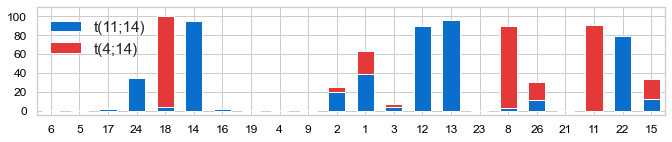

In [146]:
plt.figure(figsize=(11.27, 2))

N = len(ranks)
ind = np.arange(N)    # the x locations for the groups
w = 0.6
p1 = plt.bar(ind, 100*ranked_t1114,width=w,color='#0A6ECC',edgecolor="white",alpha=1)
p2 = plt.bar(ind, 100*ranked_t414,
             bottom=100*ranked_t1114,width=w,color='#E53939',edgecolor="white",alpha=1)

plt.xlim(-0.5,N-0.5)
plt.ylim(-5,110)
plt.yticks(np.arange(0,105,20),fontsize = 12)
plt.xticks(ticks=range(len(rank_order)),labels=list(rank_order),fontsize = 12)
plt.legend((p1[0], p2[0]), ('t(11;14)', 't(4;14)'),loc="upper left")

ax = plt.gca()
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

plt.savefig(os.path.join(resultsDirectory,"barplot_states_translocations.pdf"),bbox_inches="tight")